In [1]:
# ignore these two following instructions...
import os
os.chdir("../../../../../src/main/python/")

In [2]:
import random

from matplotlib import pyplot as plt

from pyLong.dictionnaries.colors import colors as html_colors
from pyLong.profiles.zprofile import zProfile

SQLalchemy is not installed. No support for SQL output.


# PlatRock2DViewer

## Table of contents

- [Import PlatRock2DViewer class](#Import-PlatRock2DViewer-class)

- [Constructor](#Constructor)

## Import PlatRock2DViewer class

In [3]:
from pyLong.toolbox.platrock2d_viewer import PlatRock2DViewer

## Constructor

In [4]:
viewer = PlatRock2DViewer()

In [5]:
output = "C:\\Users\\cr26739\Documents\\GitHub\\pyLong\\docs\\source\\notebooks\\toolbox\\platrock2d_viewer"
output += "\\full_output.hdf5"
viewer.from_hdf5(output)

True

In [6]:
viewer.rocks_number()

1000

In [7]:
#viewer.start_data()

In [8]:
#viewer.volumes()

In [9]:
#viewer.densities()

In [10]:
#viewer.inertias()

In [11]:
#viewer.contacts(0)

In [12]:
#viewer.x_starts()

In [13]:
#viewer.x_ends()

In [15]:
viewer.get_z_at(300, 50)

694.0380859375

1. création du profil en long du terrain naturel utilisé en entrée de la simulation --> terrain.csv

2. lecture du fichier full_output.hdf5 avec la méthode from_dbf5(filename, zprofile, isTwoDShape=False)

## Terrain profile

Since a PlatRock 2D simulation is based on a natural terrain profile, we first create an instance of **zProfile** class and populate it by importing the points contained in the file *terrain.txt*.

In [6]:
terrain = zProfile()
filename = "../../../notebooks/toolbox/platrock2d_viewer/terrain.txt"
terrain.from_txt(filename)
terrain.name = "natural terrain"

In [7]:
# print the list of points
#terrain.listing()

In [8]:
# set terrain profile style
terrain.label = "natural terrain"
terrain.line_color = "Green"
terrain.line_thickness = 2
terrain.order = 2

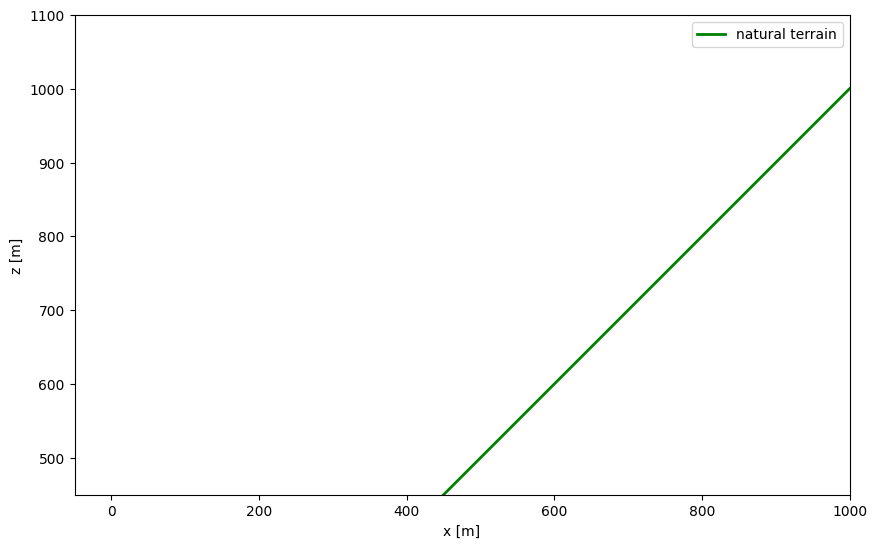

In [9]:
# plot the natural terrain profile
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_xlim((-50, 1000))
ax.set_xlabel("x [m]")

ax.set_ylim((450, 1100))
ax.set_ylabel("z [m]")

ax.set_aspect('equal')

terrain.plot(ax)

ax.legend(loc='best')

plt.show()

## Simulation

We now create an instance of **PlatRock2DViewer** class and use the *from_hdf5* method to import data contained in the file *full_output.hdf5*.

In [10]:
viewer = PlatRock2DViewer()
filename = "../../../notebooks/toolbox/platrock2d_viewer/full_output.hdf5"
viewer.from_hdf5(filename,
                 terrain,
                 dx=1.)

TypeError: from_hdf5() got an unexpected keyword argument 'dx'

Loading data consists of:
- get start data: start distance of each rock;
- get end data: end distance of each rock;
- generate the trajectories for each rock: depends on distance step argument *dx*;
- generate the heights above natural terrain for each trajectory.

This step can be time-consuming. Please be patient and don't complain.

### equations

Free fall equations used to retrieve mouvement equation $z = f(x)$ lead to:

$$x(t) = v_{x,0} . t + x_0$$

$$z(t) = - \frac{1}{2} . g . t^{2} + v_{z,0} . t + z_0$$

$$t = \frac{x - x_0}{v_{x,0}}$$

$$z(x) = - \frac{1}{2} . g . \left( \frac{x - x_0}{v_{x,0}} \right)^2 + v_{z,0} .  \left( \frac{x - x_0}{v_{x,0}} \right) + z_0$$

## Plot **n** randomly chosen trajectories

In [ ]:
n = 1000

fig, ax = plt.subplots(figsize=(10, 10))

ax.set_xlim((-50, 1000))
ax.set_xlabel("x [m]")
ax.set_ylim((450, 1100))
ax.set_ylabel("z [m]")

ax.set_aspect('equal')

terrain.plot(ax)

for i, c in zip(random.choices(range(viewer._n), k=n),
                random.choices(list(html_colors.keys()), k=n)):
    
    trajectory = viewer.trajectory(i)
    
    trajectory.line_style = 'solid'
    trajectory.line_thickness = 1
    trajectory.line_color = c
    
    trajectory.plot(ax)

ax.legend(loc='best')

plt.tight_layout()
plt.show()

## Plot **n** randomly chosen heights above natural terrain

In [ ]:
n = 1000

fig, ax = plt.subplots(figsize=(10, 10))

ax.set_xlim((-50, 1000))
ax.set_xlabel("x [m]")
ax.set_ylim((0, 110))
ax.set_ylabel("z [m]")

ax.set_aspect('equal')

for i, c in zip(random.choices(range(viewer._n), k=n),
                random.choices(list(html_colors.keys()), k=n)):
    
    height = viewer.height(i)
    
    height.line_style = 'solid'
    height.line_thickness = 1
    height.line_color = c
    
    height.plot(ax)

plt.tight_layout()
plt.show()

## Start points distribution

In [ ]:
min(viewer._starts)

In [ ]:
max(viewer._starts)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_xlim((0, 215))
ax.set_xlabel("x [m]")

ax.hist(viewer._starts, bins=50, range=(5,210), density=True, cumulative=True, stacked=True)

plt.tight_layout()
plt.show()

## End points distribution

In [ ]:
min(viewer._ends)

In [ ]:
max(viewer._ends)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_xlim((450, 750))
ax.set_xlabel("x [m]")

ax.hist(viewer._ends, bins=100, range=(455, 736), density=True, cumulative=True, stacked=True, histtype="stepfilled")
#x.hist(viewer._ends, bins=20, range=(450, 750), density=True)

plt.tight_layout()
plt.show()

In [ ]:
heights, statistics = viewer.heights_between(100, 105, 1)

In [ ]:
statistics